In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15,10

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = 'E:/Driven Data/Dengu_AI/dengue_features_train.csv'

In [4]:
dft = pd.read_csv(data)

In [5]:
dft.shape

(1456, 24)

In [6]:
data_test = 'E:/Driven Data/Dengu_AI/dengue_features_test.csv'

In [7]:
dftest = pd.read_csv(data_test)

In [8]:
dftest['week_start_date']=pd.to_datetime(dftest['week_start_date'])
dftest['month'] = dftest['week_start_date'].dt.month

In [9]:
dftrain = pd.concat((dft,dftest), sort=False)

In [10]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 415
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1872 non-null   object 
 1   year                                   1872 non-null   int64  
 2   weekofyear                             1872 non-null   int64  
 3   week_start_date                        1872 non-null   object 
 4   ndvi_ne                                1635 non-null   float64
 5   ndvi_nw                                1809 non-null   float64
 6   ndvi_se                                1849 non-null   float64
 7   ndvi_sw                                1849 non-null   float64
 8   precipitation_amt_mm                   1857 non-null   float64
 9   reanalysis_air_temp_k                  1860 non-null   float64
 10  reanalysis_avg_temp_k                  1860 non-null   float64
 11  reana

In [11]:
dftrain_filled = dftrain.fillna(method='ffill')

In [12]:
dftrain_filled.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,...,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,416.000000
mean,2003.194979,26.489316,0.127456,0.127121,0.203719,0.201878,44.016490,298.724492,299.250065,295.282237,...,82.239638,44.016490,16.784062,4.946192,27.219965,8.028400,32.462714,22.159348,38.031571,6.415865
std,6.292268,15.006319,0.144399,0.124698,0.075467,0.085514,42.129256,1.386506,1.272981,1.528221,...,7.209495,42.129256,1.547489,3.541669,1.270008,2.196799,1.953139,1.606064,44.882019,3.452624
min,1990.000000,1.000000,-0.463400,-0.456100,-0.015533,-0.063457,0.000000,294.554286,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.042857,26.700000,14.200000,0.000000,1.000000
25%,1999.000000,13.750000,0.030467,0.039510,0.152364,0.141046,9.097500,297.675357,298.264286,294.164643,...,77.201786,9.097500,15.590714,2.357143,26.328571,6.367857,31.100000,21.100000,8.875000,3.750000
50%,2004.000000,26.000000,0.109800,0.110975,0.196368,0.189350,36.310000,298.617143,299.292857,295.662857,...,80.304286,36.310000,17.130714,2.871429,27.414286,7.242857,32.800000,22.200000,23.600000,6.500000
75%,2008.000000,39.000000,0.237238,0.219307,0.250196,0.247404,67.357500,299.886071,300.266071,296.501786,...,86.799286,67.357500,18.025357,7.757143,28.171429,9.650000,33.900000,23.300000,51.100000,9.000000
max,2013.000000,53.000000,0.508357,0.649000,0.538314,0.546017,390.600000,302.200000,303.328571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,26.700000,543.300000,12.000000


In [15]:
dftrain_filled.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,NaN
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,NaN
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,NaN
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,NaN
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,NaN


In [16]:
dftrain_filled.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month'],
      dtype='object')

In [17]:
df = dftrain_filled[:1456]

In [18]:
df_labels = 'E:/Driven Data/Dengu_AI/dengue_labels_train.csv'

In [19]:
df_labels_import = pd.read_csv(df_labels)

In [20]:
df_labels_import.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [21]:
df_labels_import.shape

(1456, 4)

In [22]:
df_merged = pd.merge(df,df_labels_import)

In [23]:
df_merged

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,NaN,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,NaN,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,NaN,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,NaN,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,NaN,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,NaN,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,NaN,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,NaN,1


In [24]:
df_merged.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [25]:
df_merged['week_start_date'] = pd.to_datetime(df_merged['week_start_date'])

In [26]:
df_merged['month'] = df_merged['week_start_date'].dt.month

In [27]:
df_sj = df_merged[df_merged['city']=='sj']
df_iq = df_merged[df_merged['city']!='sj']

In [28]:
df_sj.columns.astype(str)

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month', 'total_cases'],
      dtype='object')

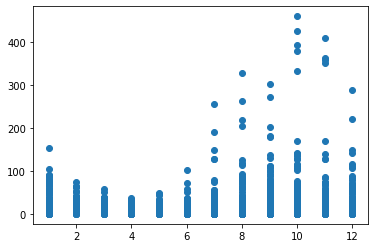

In [29]:
plt.scatter(df_merged['month'], df_merged['total_cases'])

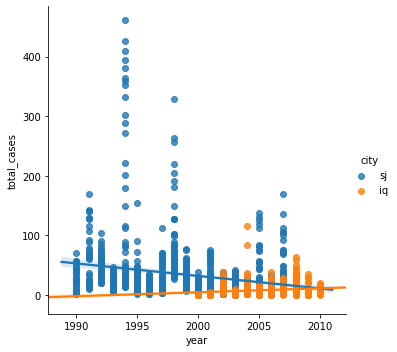

In [30]:
sns.lmplot(x= 'year',y = 'total_cases', hue='city', data = df_merged)

In [31]:
y_sj = np.log1p(df_sj['total_cases'])
y_iq = np.log1p(df_iq['total_cases'])

In [32]:
df_sj.drop(['week_start_date','city'], axis=1, inplace=True)
df_iq.drop(['week_start_date', 'city'], axis=1, inplace=True)

In [33]:
sj_corr = df_sj.corr()
iq_corr = df_iq.corr()

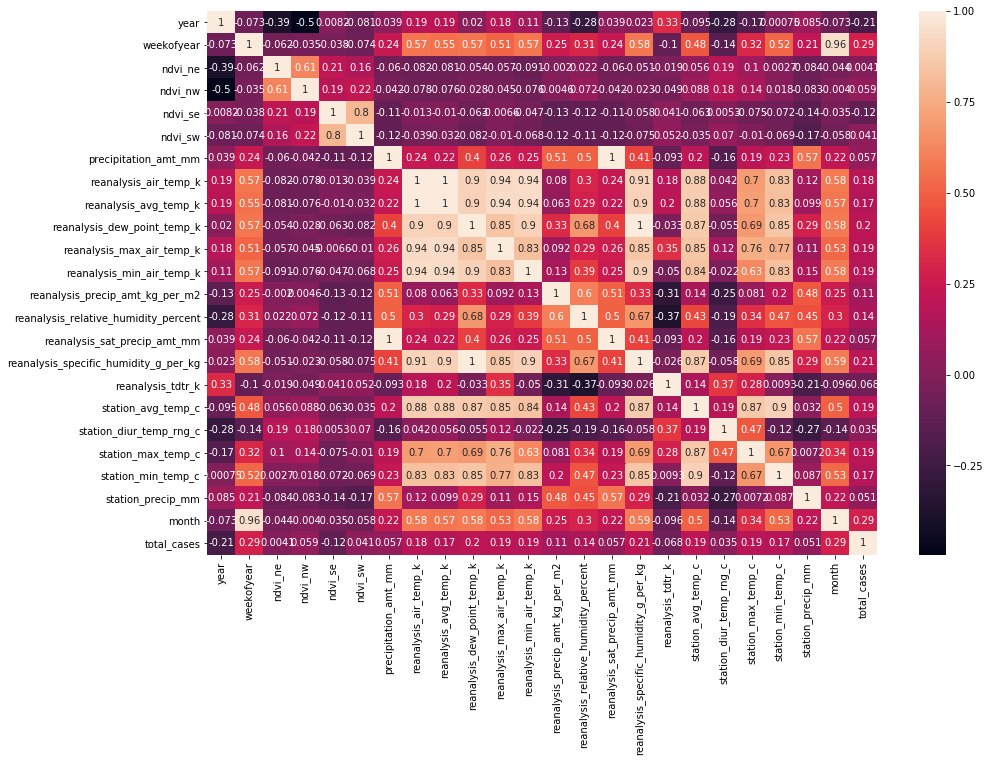

In [221]:
plt.figure(figsize=(15,10))
sns.heatmap(sj_corr, annot=True)

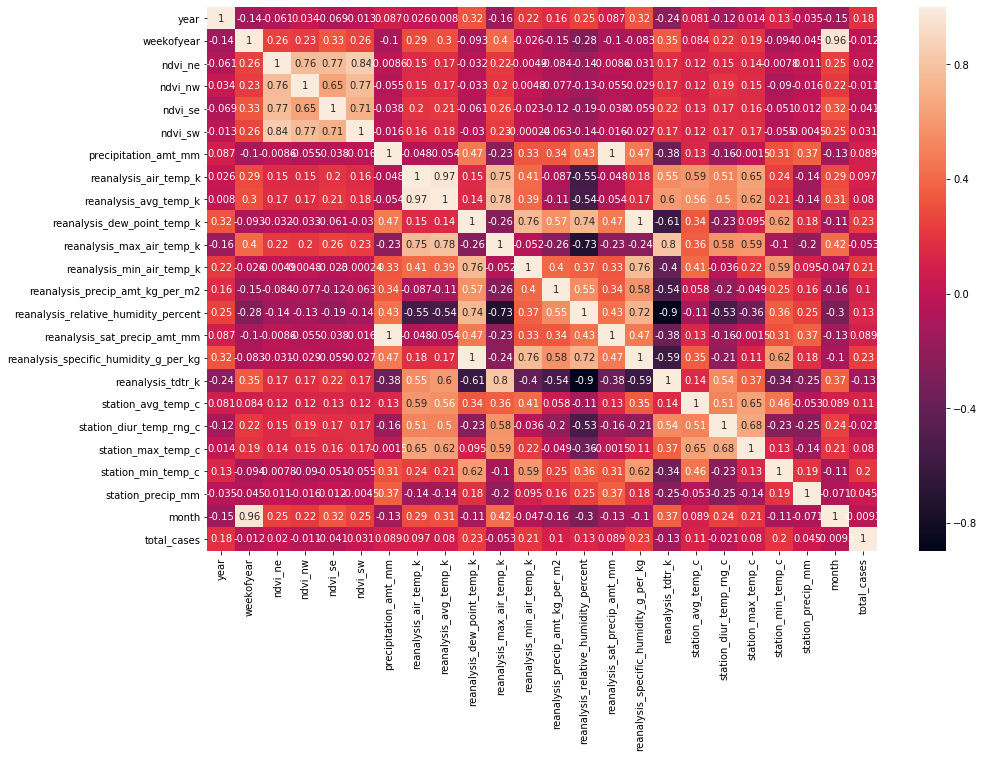

In [220]:
plt.figure(figsize=(15,10))
sns.heatmap(iq_corr, annot=True)

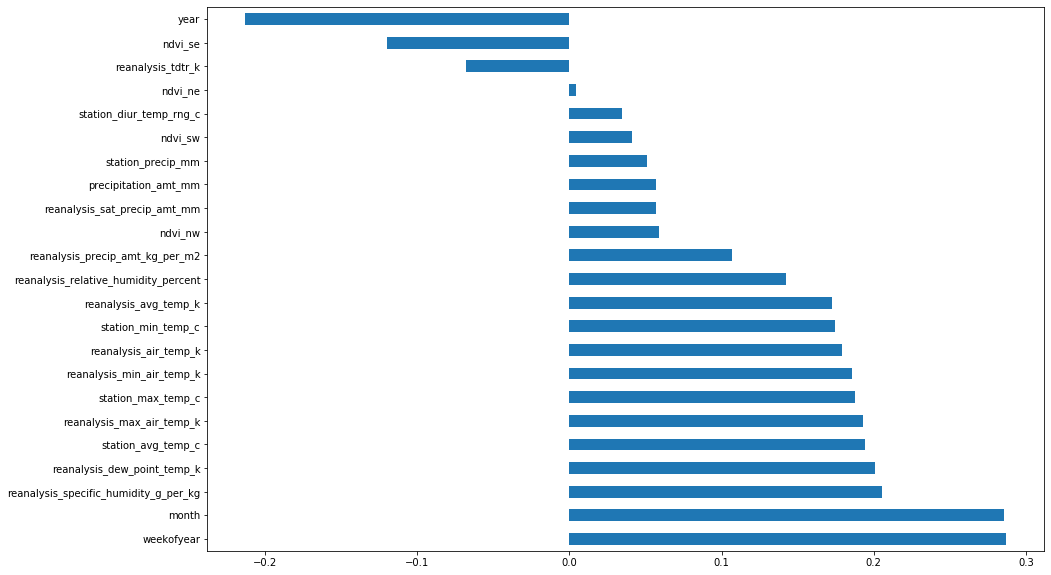

In [36]:
plt.figure(figsize=(15,10))
sj_corr.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()

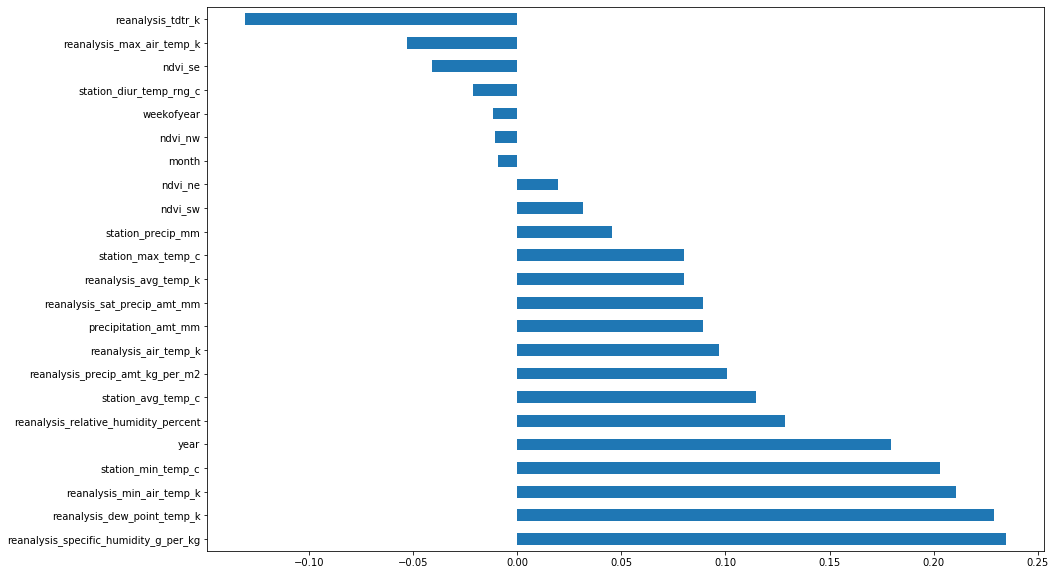

In [37]:
plt.figure(figsize=(15,10))
iq_corr.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()

In [38]:
df_merged.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [39]:
df_merged.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month', 'total_cases'],
      dtype='object')

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [41]:
df_merged['station_max_temp_c'].describe()

count    1456.000000
mean       32.443338
std         1.960769
min        26.700000
25%        31.100000
50%        32.800000
75%        33.900000
max        42.200000
Name: station_max_temp_c, dtype: float64

In [248]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
def imp_parameters(x):
    x.fillna(method='ffill', inplace=True)
    x['week_start_date'] = pd.to_datetime(x['week_start_date'])
    x['month'] = x['week_start_date'].dt.month
    x = pd.get_dummies(x, columns=['city'],prefix=['city'], drop_first=True)
    features = ['city_sj','month','reanalysis_tdtr_k','weekofyear','year','station_max_temp_c']
    x = x[features]
    x = sc.fit_transform(x)
    return x

In [249]:
c = ['city_sj','month','reanalysis_tdtr_k','weekofyear','year','station_max_temp_c']

In [250]:
df_final = imp_parameters(df_merged)

df_merged.drop('week_start_date', axis=1, inplace=True)

df_merged_encoded = pd.get_dummies(df_merged, columns=['city'], drop_first=True)

df_merged_encoded

In [252]:
x = df_final
y = np.log1p(df_merged['total_cases'])

In [253]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=123)

# Modeling RF

In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

In [255]:
rf = RandomForestRegressor(n_estimators=5000, criterion='mse', min_samples_split = 3, min_samples_leaf=2)

In [256]:
model_rf = rf.fit(xtrain,ytrain)

In [257]:
model_rf_predict = model_rf.predict(xtest)

In [259]:
mae((np.exp(ytest)-1).astype(int), 1.15*(np.exp(model_rf_predict)-1).astype(int))

9.323340961098397

In [260]:
ytest.size

437

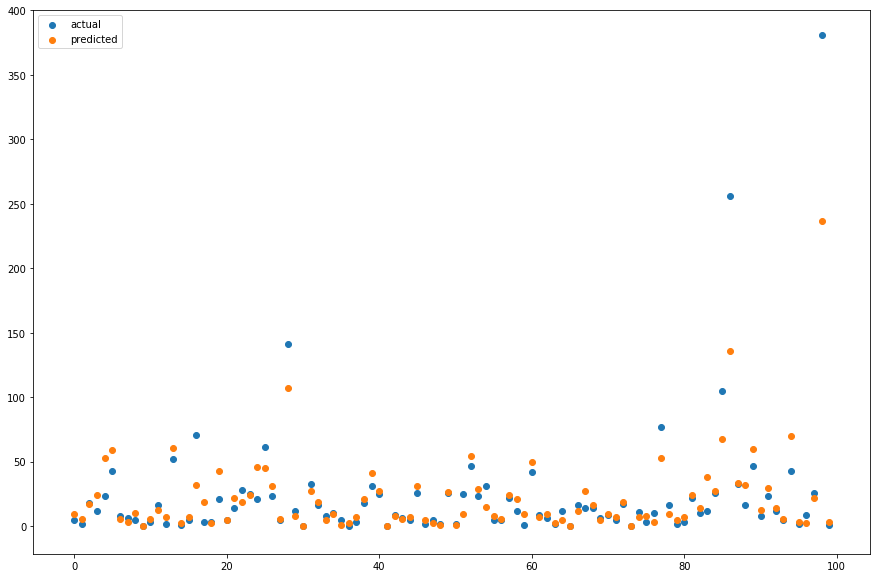

In [261]:
plt.figure(figsize=(15,10))
plt.scatter(np.arange(0,100),(np.exp(ytest)-1).astype(int)[:100], label='actual')
plt.scatter(np.arange(0,100),1.15*(np.exp(model_rf_predict)-1).astype(int)[:100], label='predicted')
plt.legend()

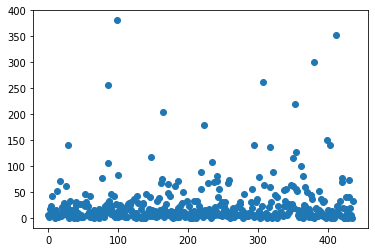

In [262]:
plt.scatter(np.arange(0,437),(np.exp(ytest)-1).astype(int))

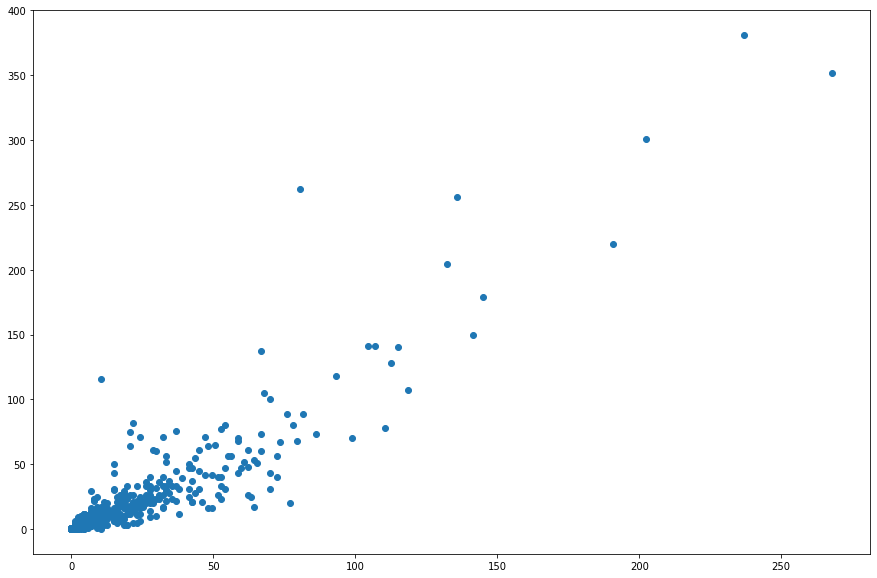

In [263]:
plt.figure(figsize=(15,10))
plt.scatter(1.15*(np.exp(model_rf_predict)-1).astype(int),(np.exp(ytest)-1).astype(int))


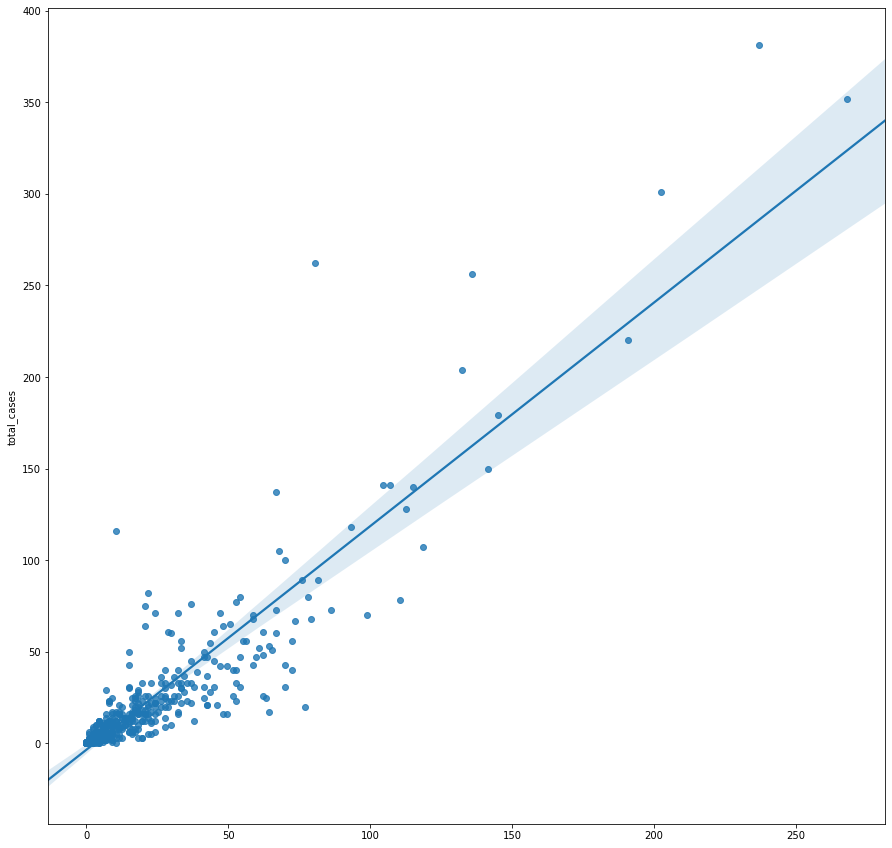

In [264]:
plt.figure(figsize=(15,15))
sns.regplot(1.15*(np.exp(model_rf_predict)-1).astype(int),(np.exp(ytest)-1).astype(int))

imp = pd.DataFrame(rf.feature_importances_, c)

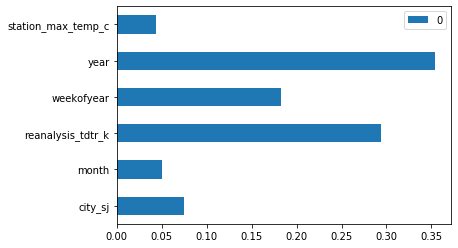

In [247]:
imp.plot(kind='barh')

In [266]:
(1.15*np.array(np.exp(model_rf_predict)-1)).astype(int)

array([  9,   5,  18,  24,  54,  59,   6,   4,  10,   0,   6,  13,   7,
        61,   3,   7,  32,  18,   3,  42,   4,  22,  19,  24,  46,  45,
        31,   6, 107,   8,   0,  27,  18,   5,   9,   2,   2,   7,  21,
        41,  28,   0,   9,   6,   7,  31,   5,   2,   1,  27,   1,  10,
        55,  29,  15,   8,   5,  24,  21,   9,  49,   7,   9,   2,   4,
         0,  11,  28,  16,   4,  10,   7,  18,   0,   8,   8,   3,  53,
        10,   5,   8,  24,  14,  38,  28,  68, 136,  33,  32,  60,  12,
        30,  14,   5,  71,   4,   3,  22, 236,   3,  21,  16,  15,  64,
         4,  10,  16,  49,  16,   5,  20,   4,   7,  11,  33,   7,  23,
        17,  49,  45,  19,   5,  43,   4,   6,   0,  12,  15,  43,   5,
         1,   2,   0,  12,   2,  19,  18,   2,   6,   5,  42,   5,   9,
        10,  20,   6,  32,  94,  24,  11,   1,   7,  14,  10,   0,  17,
        30,   5,   9,  39,  15,  74,  21,  12, 133,  29,   3,  16,   4,
        18,   4,  51,  63,  15,  47,   6,  15,   3,   2,   1,  2

In [570]:
(np.array(np.exp(ytest)-1)).astype(int)

array([  5,   2,  18,  12,  23,  43,   8,   6,   5,   0,   3,  16,   2,
        52,   1,   5,  71,   3,   3,  21,   5,  14,  28,  25,  21,  61,
        23,   5, 141,  12,   0,  33,  16,   8,  10,   5,   0,   3,  18,
        31,  25,   0,   9,   6,   5,  26,   2,   5,   2,  26,   2,  25,
        47,  23,  31,   5,   5,  22,  12,   1,  42,   9,   6,   2,  12,
         0,  16,  14,  14,   6,   9,   5,  17,   0,  11,   3,  10,  77,
        16,   2,   3,  22,  10,  12,  26, 105, 256,  33,  16,  47,   8,
        23,  12,   5,  43,   2,   9,  26, 381,   1,  82,  16,  12,  25,
         3,  14,  21,  16,  16,   1,  16,   3,   2,  21,  26,  29,  17,
        25,  16,  31,  12,   5,  37,   2,   6,   0,   9,  43,  28,   3,
         1,   1,   0,  17,   3,  29,  26,   0,   8,   0,  47,   6,  11,
        12,  18,   3,  40, 118,  16,   9,   3,   5,  14,  12,   1,   6,
        32,   3,  11,  39,  16,  67,  75,   9, 204,  20,   2,  12,  12,
        26,   5,  65,  48,  11,  42,   3,  14,   2,   1,   0,  1

# XGBoost

In [66]:
from xgboost import XGBRegressor

In [67]:
xgb = XGBRegressor(learning_rate=0.1, n_estimators=300, colsample_bytree=0.4, booster='gbtree', objective='reg:linear')

In [68]:
model_xgb = xgb.fit(xtrain,ytrain)

[21:16:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [69]:
model_xgb_predict = xgb.predict(xtest)

In [70]:
mae((np.exp(ytest)-1).astype(int), (np.exp(model_xgb_predict)-1).astype(int))

12.418764302059497

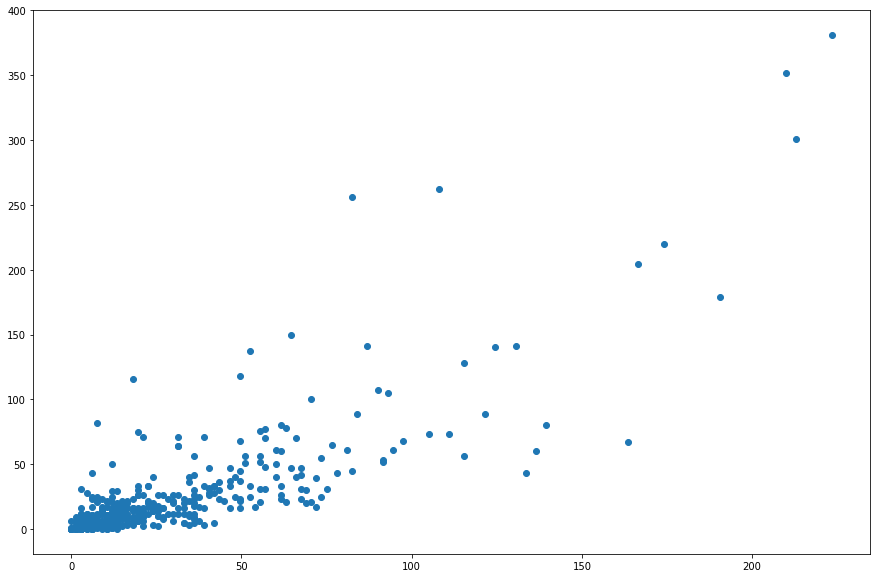

In [156]:
plt.figure(figsize=(15,10))
plt.scatter(1.5*(np.exp(model_xgb_predict)-1).astype(int),(np.exp(ytest)-1).astype(int))

In [618]:
imp_xgb = pd.DataFrame(xgb.feature_importances_, c)

<Figure size 1080x720 with 0 Axes>

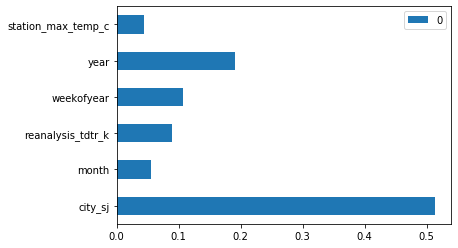

In [619]:
plt.figure(figsize=(15,10))
imp_xgb.plot(kind='barh')

In [95]:
rf_xgb = (0.7*(np.exp(model_lgbm_predict)-1).astype(int)) + \
          (0.3*(np.exp(model_rf_predict)-1).astype(int))

In [96]:
rf_xgb = rf_xgb.astype(int)

In [97]:
mae((np.exp(ytest)-1).astype(int), rf_xgb)

10.578947368421053

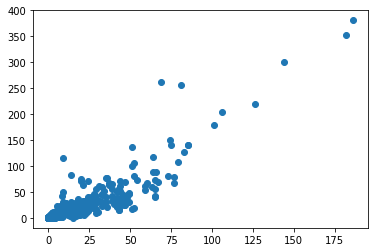

In [98]:
plt.scatter(rf_xgb,(np.exp(ytest)-1).astype(int))

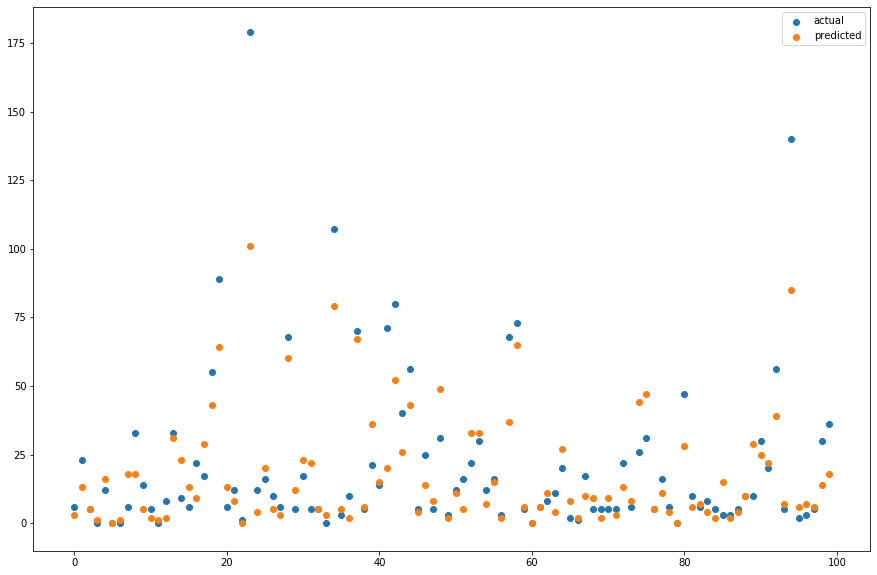

In [206]:
plt.figure(figsize=(15,10))
plt.scatter(np.arange(0,100),(np.exp(ytest)-1).astype(int)[200:300], label='actual')
plt.scatter(np.arange(0,100),rf_xgb[200:300], label='predicted')
plt.legend()

# Decision Trees

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
dt = DecisionTreeRegressor(max_depth=11)

In [74]:
model_dt = dt.fit(xtrain,ytrain)

In [75]:
model_dt_predict = dt.predict(xtest)

In [76]:
mae((np.exp(ytest)-1).astype(int),(np.exp(model_dt_predict)-1).astype(int))

10.766590389016018

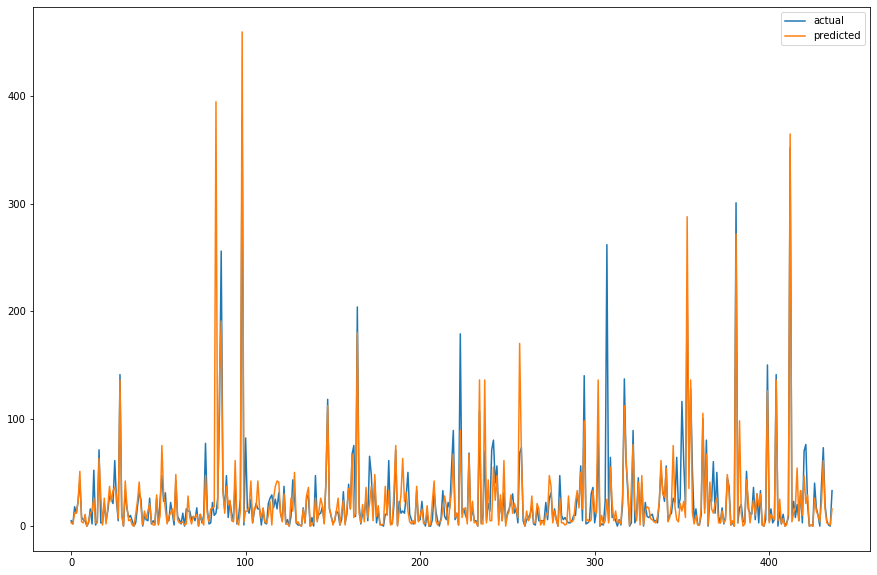

In [77]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(0,437),(np.exp(ytest)-1).astype(int), label='actual')
plt.plot(np.arange(0,437),(np.exp(model_dt_predict)-1).astype(int), label='predicted')
plt.legend()

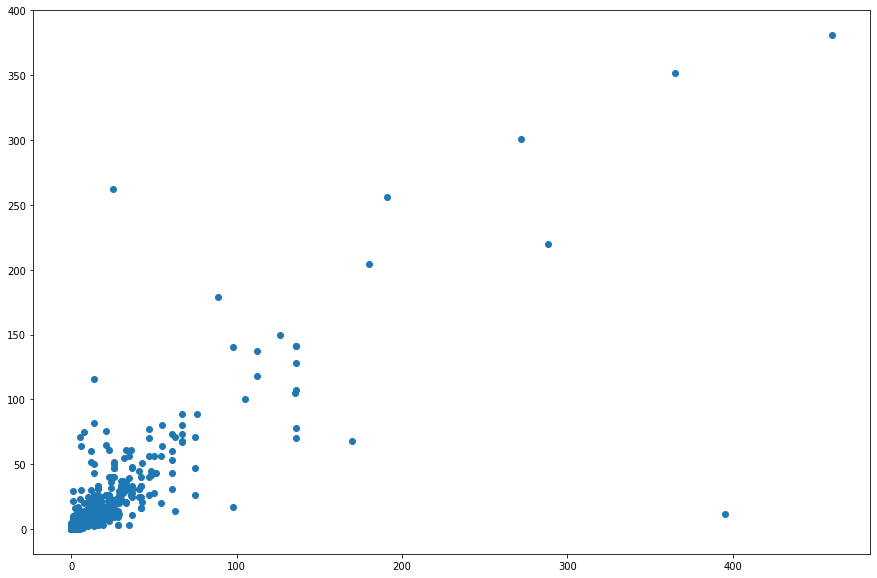

In [78]:
plt.figure(figsize=(15,10))
plt.scatter((np.exp(model_dt_predict)-1).astype(int),(np.exp(ytest)-1).astype(int))

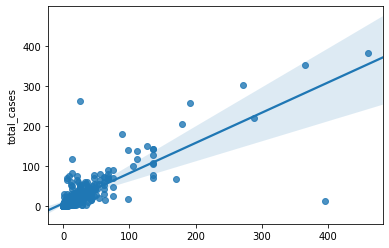

In [94]:
sns.regplot((np.exp(model_dt_predict)-1).astype(int),(np.exp(ytest)-1).astype(int))

# ElasticNet

In [79]:
from sklearn.linear_model import ElasticNet

In [80]:
elastic = ElasticNet(l1_ratio=0.4,max_iter=10000)

In [81]:
model_elastic = elastic.fit(xtrain,ytrain)

In [82]:
model_elastic_predict = elastic.predict(xtest)

In [83]:
mae((np.exp(ytest)-1).astype(int),(np.exp(model_elastic_predict)-1).astype(int))

19.356979405034323

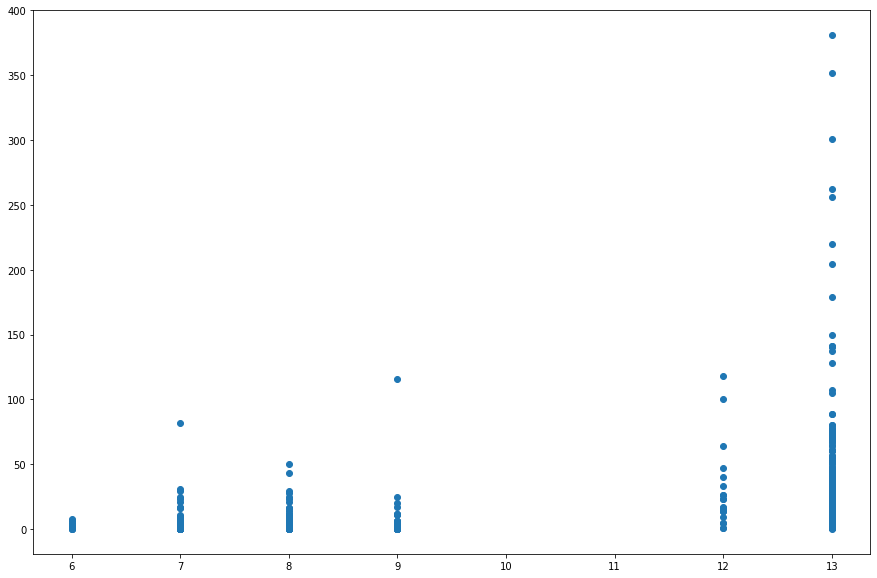

In [84]:
plt.figure(figsize=(15,10))
plt.scatter((np.exp(model_elastic_predict)-1).astype(int),(np.exp(ytest)-1).astype(int))

# Light GBM

In [86]:
from lightgbm import LGBMRegressor

In [87]:
lgbm = LGBMRegressor(learning_rate=0.01,
                      n_estimators=400,
                      nthread=-1,
                      seed=27,
                      random_state=123)

In [88]:
model_lgbm = lgbm.fit(xtrain,ytrain)

In [89]:
model_lgbm_predict = lgbm.predict(xtest)

In [279]:
mae((np.exp(ytest)-1).astype(int),1.25*(np.exp(model_lgbm_predict)-1).astype(int))

11.084668192219679

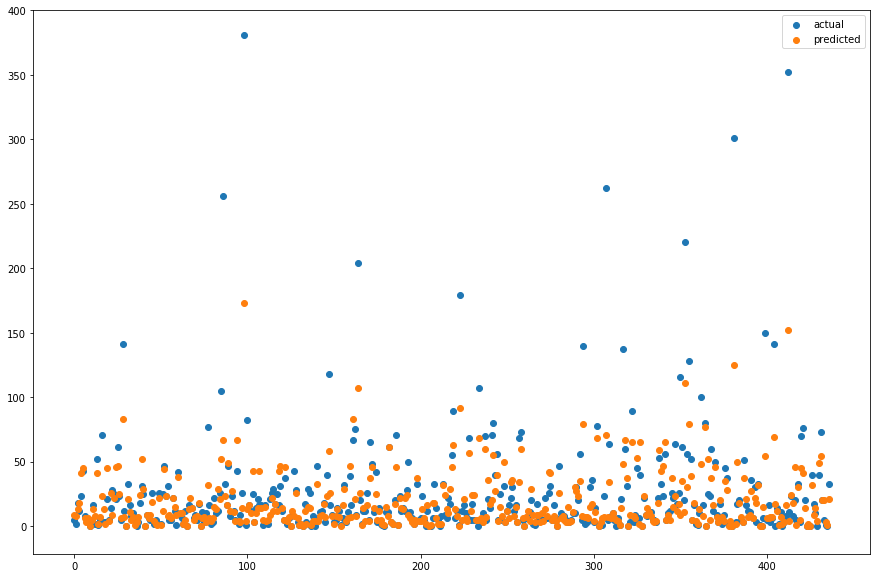

In [276]:
plt.figure(figsize=(15,10))
plt.scatter(np.arange(0,437),(np.exp(ytest)-1).astype(int), label='actual')
plt.scatter(np.arange(0,437),(np.exp(model_lgbm_predict)-1).astype(int), label='predicted')
plt.legend()

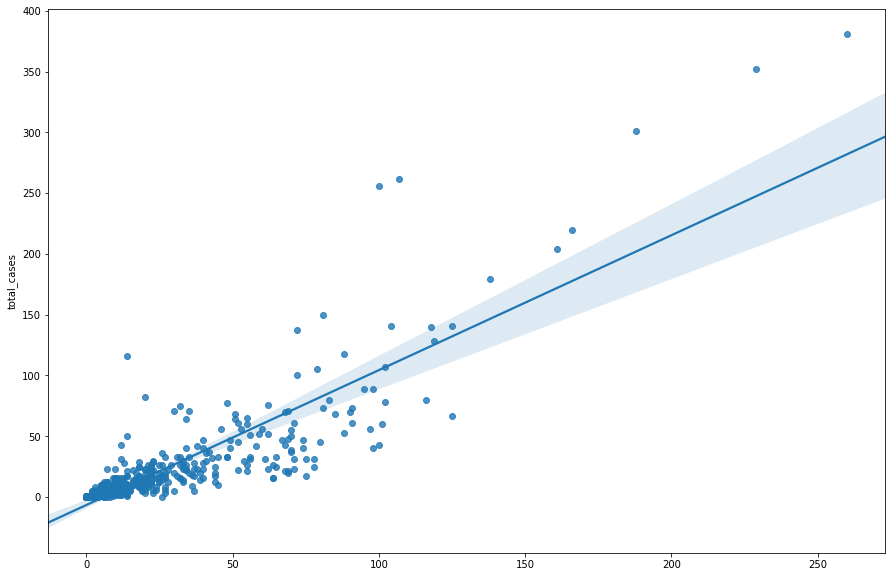

In [277]:
plt.figure(figsize=(15,10))
sns.regplot((1.5*(np.exp(model_lgbm_predict)-1)).astype(int),(np.exp(ytest)-1).astype(int))

In [628]:
df_150 = df_merged[df_merged['total_cases']>150]

In [589]:
df_150.drop('city',axis=1,inplace=True)

In [494]:
df_150

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month
82,1991,48,1991-11-26,0.087867,0.151900,0.179629,0.166186,35.34,298.375714,298.500000,...,35.34,16.322857,2.028571,26.271429,6.585714,30.0,22.2,76.2,169,11
226,1994,35,1994-09-03,0.021850,0.145250,0.213786,0.204086,59.91,300.392857,300.535714,...,59.91,17.705714,2.528571,29.428571,6.885714,33.9,25.6,11.0,179,9
227,1994,36,1994-09-10,0.045850,0.076225,0.291686,0.247971,19.45,300.074286,300.178571,...,19.45,17.521429,2.642857,29.285714,6.357143,33.3,24.4,14.4,202,9
228,1994,37,1994-09-17,0.045850,0.076225,0.095500,0.192925,61.11,299.951429,300.057143,...,61.11,17.305714,2.457143,28.557143,6.900000,34.4,23.9,50.8,272,9
229,1994,38,1994-09-24,0.045850,0.076225,0.095500,0.192925,39.22,299.885714,300.035714,...,39.22,17.354286,1.985714,28.371429,6.185714,32.2,24.4,34.3,302,9
230,1994,39,1994-10-01,0.045850,0.076225,0.095500,0.192925,55.88,299.508571,299.642857,...,55.88,17.248571,2.600000,28.014286,6.700000,33.9,23.3,31.5,395,10
231,1994,40,1994-10-08,0.045850,0.076225,0.095500,0.192925,0.63,300.377143,300.500000,...,0.63,16.744286,2.628571,28.714286,6.900000,34.4,24.4,8.2,426,10
232,1994,41,1994-10-15,0.045850,0.076225,0.095500,0.192925,16.70,299.638571,299.621429,...,16.70,16.900000,2.728571,28.328571,7.657143,35.0,23.9,39.2,461,10
233,1994,42,1994-10-22,0.045850,0.076225,0.095500,0.192925,75.57,300.238571,300.400000,...,75.57,17.124286,3.028571,28.571429,7.442857,35.0,23.9,5.4,381,10
234,1994,43,1994-10-29,0.045850,0.076225,0.095500,0.192925,111.52,298.811429,298.857143,...,111.52,17.641429,1.657143,27.671429,7.271429,32.8,23.3,39.2,333,10


In [495]:
df_150.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1995.560000,40.040000,0.061852,0.080207,0.145207,0.187203,43.335600,299.772000,299.850571,296.175657,...,43.335600,17.625600,2.359429,28.070286,6.905143,32.872000,23.472000,38.396000,283.320000,9.240000
std,3.096773,6.187891,0.046149,0.027936,0.060086,0.026856,28.660027,0.797124,0.792444,0.786513,...,28.660027,0.850097,0.461543,0.844731,0.633166,1.331828,1.096403,33.478233,92.781428,2.222611
min,1991.000000,30.000000,0.021850,0.024767,0.095500,0.117729,0.630000,297.808571,297.950000,294.812857,...,0.630000,16.178571,1.500000,26.271429,5.728571,30.000000,21.100000,1.900000,154.000000,1.000000
25%,1994.000000,35.000000,0.045850,0.076225,0.095500,0.173900,19.450000,299.297143,299.300000,295.674286,...,19.450000,17.067143,2.028571,27.557143,6.414286,32.200000,22.200000,11.000000,202.000000,8.000000
50%,1994.000000,40.000000,0.045850,0.076225,0.095500,0.192925,38.440000,299.885714,300.035714,296.131429,...,38.440000,17.521429,2.400000,28.157143,6.885714,32.800000,23.900000,34.300000,272.000000,10.000000
75%,1998.000000,45.000000,0.053467,0.076225,0.180967,0.192925,61.110000,300.377143,300.500000,296.642857,...,61.110000,18.118571,2.671429,28.571429,7.271429,33.900000,24.400000,50.800000,359.000000,11.000000
max,2007.000000,52.000000,0.243800,0.151900,0.291686,0.247971,111.520000,301.022857,301.028571,297.467143,...,111.520000,19.027143,3.271429,29.428571,8.742857,35.000000,25.600000,146.400000,461.000000,12.000000


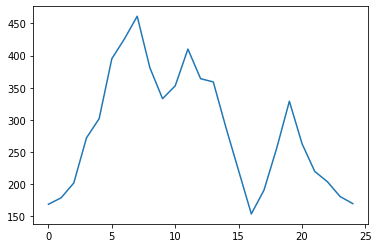

In [422]:
plt.plot(np.arange(0,25),df_150['total_cases'])

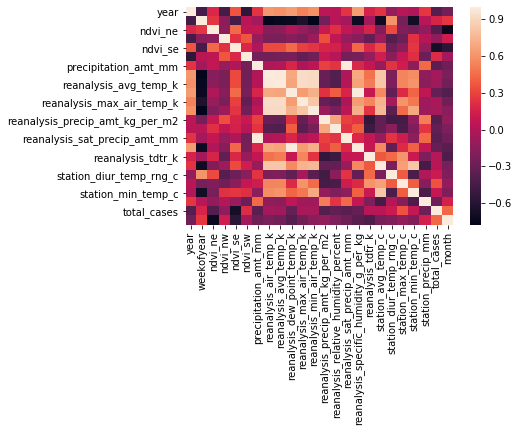

In [414]:
sns.heatmap(df_150.corr())

In [462]:
df_150.columns

Index(['year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month'],
      dtype='object')

In [499]:
df_150[['total_cases','station_max_temp_c','ndvi_sw']]

,total_cases,station_max_temp_c,ndvi_sw
82,169,30.0,0.166186
226,179,33.9,0.204086
227,202,33.3,0.247971
228,272,34.4,0.192925
229,302,32.2,0.192925
230,395,33.9,0.192925
231,426,34.4,0.192925
232,461,35.0,0.192925
233,381,35.0,0.192925
234,333,32.8,0.192925


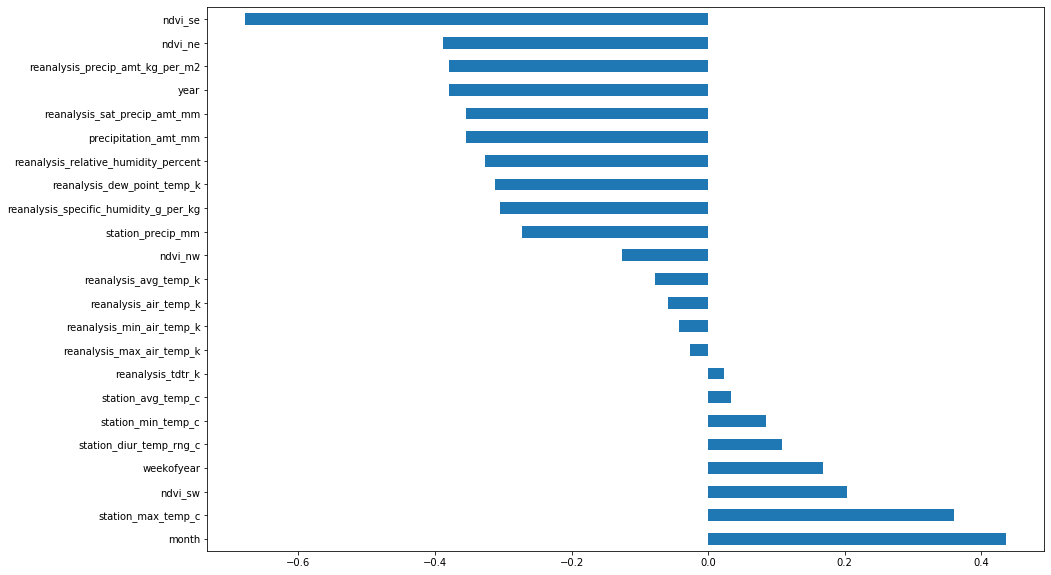

In [417]:
plt.figure(figsize=(15,10))
df_150.corr().total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()

In [280]:
def regression(x):
    model_rf_predict = rf.predict(x)
    model_lgbm_predict = lgbm.predict(x)
    model_dt_predict = dt.predict(x)
    final =(1.15*(np.exp(model_rf_predict)-1).astype(int))
    return final

In [281]:
df_test = imp_parameters(dftest)

In [282]:
df_test.shape

(416, 6)

In [283]:
prediction = regression(df_test)

In [284]:
prediction_final = prediction.astype('int')

In [285]:
prediction_final 

array([ 20,  17,  10,  11,  20,  19,  20,  20,  19,  20,  21,  21,  23,
        25,  32,  35,  35,  50,  93, 123, 103, 110, 128, 110, 120, 111,
       110, 112, 102, 110, 109, 101,  98,  96,  92,  51,  43,  33,  47,
        40,  29,  31,  29,  29,  24,  19,  18,  23,  17,  21,  23,  25,
        20,  20,  23,  27,  27,  32,  33,  37,  41,  49,  49,  52,  57,
        56,  63,  65,  64, 142, 327, 209, 216, 296, 208, 246, 195, 255,
       247, 232, 270, 195, 194, 161, 142, 129, 146,  81,  70,  70,  54,
        62,  51,  62,  55,  51,  46,  41,  39,  39,  37,  37,  37,  36,
        37,  42,  42,  49,  54,  65,  70,  75,  94, 131, 133, 133, 146,
       155, 116,  98, 158,  82, 123, 135,  88, 108,  88, 106,  85,  92,
       103,  81,  88,  96,  74,  88,  82,  82,  81,  12,  26,  24,  21,
        25,  18,  13,  14,  14,   5,   4,   4,   4,   5,   5,   3,   3,
         3,   3,   3,   6,   3,   3,   3,   6,   4,   5,   5,   5,   5,
         5,   6,   8,   9,   9,   8,   9,   9,   9,  10,  10,  1

In [168]:
prediction_final

array([ 20,  17,  10,  11,  20,  19,  20,  20,  19,  20,  21,  21,  23,
        25,  32,  35,  36,  51,  93, 121, 103, 112, 127, 111, 120, 112,
       113, 113, 103, 111, 111, 103, 101,  97,  93,  51,  43,  33,  47,
        40,  29,  31,  29,  29,  23,  19,  18,  23,  17,  21,  23,  25,
        19,  21,  23,  26,  28,  33,  33,  39,  41,  49,  49,  52,  57,
        56,  64,  67,  65, 146, 327, 211, 219, 297, 210, 248, 200, 256,
       251, 235, 276, 197, 198, 163, 146, 133, 147,  80,  70,  70,  54,
        62,  51,  63,  56,  52,  46,  41,  39,  39,  37,  37,  37,  36,
        37,  42,  42,  49,  54,  65,  70,  74,  94, 131, 133, 134, 146,
       155, 114,  97, 158,  81, 126, 136,  88, 110,  89, 108,  86,  93,
       102,  81,  87,  97,  74,  88,  85,  82,  81,  12,  25,  24,  21,
        25,  18,  13,  14,  14,   5,   4,   4,   4,   5,   5,   3,   3,
         3,   3,   3,   6,   3,   3,   3,   6,   4,   5,   5,   5,   5,
         5,   6,   8,   9,   9,   8,   9,   9,   9,  10,  10,  1

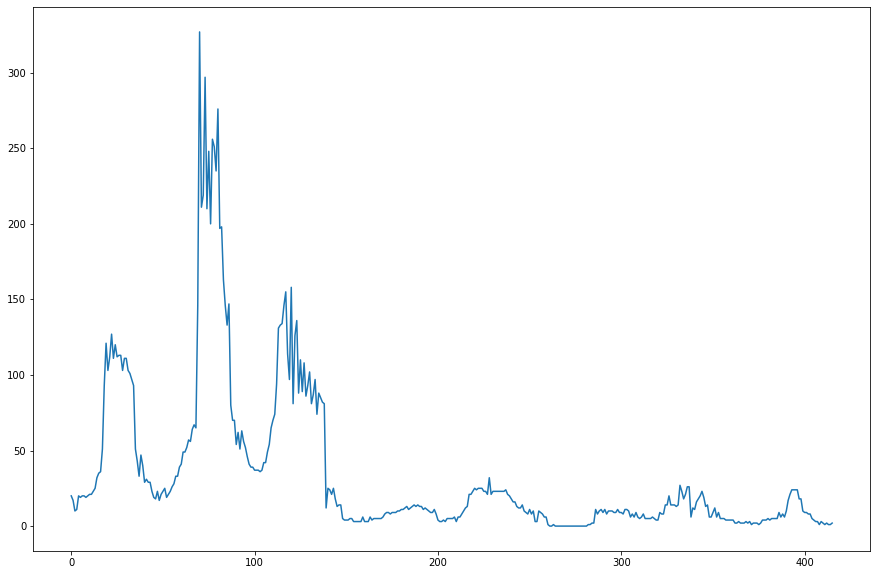

In [169]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(0,416),prediction_final, label='actual')

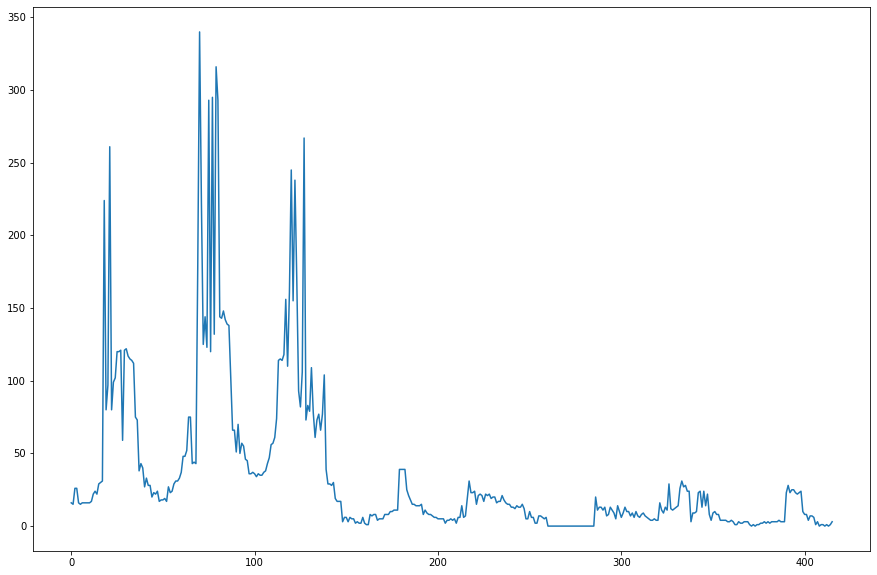

In [819]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(0,416),prediction_final, label='actual')

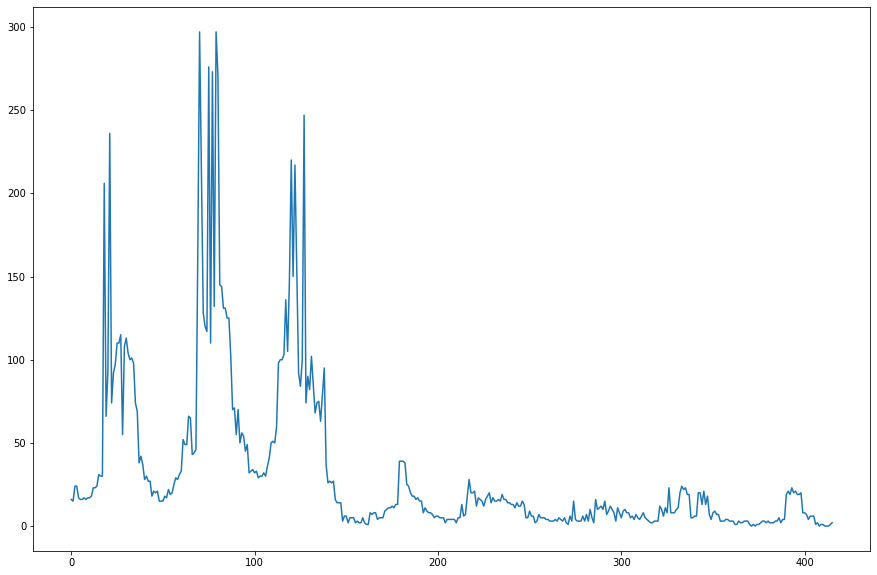

In [716]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(0,416),prediction_final, label='actual')

# Writing in to a file

In [820]:
submission = pd.DataFrame({'city':dftest['city'],'year':dftest['year'],'weekofyear':dftest['weekofyear'],'total_cases':prediction_final})

In [821]:
submission.to_csv('Dengue_18.csv', index=False)

In [822]:
submission

,city,year,weekofyear,total_cases
0,sj,2008,18,16
1,sj,2008,19,15
2,sj,2008,20,26
3,sj,2008,21,26
4,sj,2008,22,16
...,...,...,...,...
411,iq,2013,22,0
412,iq,2013,23,1
413,iq,2013,24,0
414,iq,2013,25,1
